In [1]:
import os

import csv
import cv2
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg

In [2]:
data_path='data'
label_path='data/driving_log.csv'

In [3]:
import pandas as pd
import numpy as np

dataset=pd.read_csv(label_path)
dataset.head()

,C:\Users\oshad\Downloads\Deep learning\day 6\Self-driving-car-simulator\data\IMG\center_2024_08_06_20_33_13_884.jpg,C:\Users\oshad\Downloads\Deep learning\day 6\Self-driving-car-simulator\data\IMG\left_2024_08_06_20_33_13_884.jpg,C:\Users\oshad\Downloads\Deep learning\day 6\Self-driving-car-simulator\data\IMG\right_2024_08_06_20_33_13_884.jpg,0,0.1,0.2,9.147451E-06
0,C:\Users\oshad\Downloads\Deep learning\day 6\S...,C:\Users\oshad\Downloads\Deep learning\day 6\S...,C:\Users\oshad\Downloads\Deep learning\day 6\S...,0.0,0.0,0.0,0.000005
1,C:\Users\oshad\Downloads\Deep learning\day 6\S...,C:\Users\oshad\Downloads\Deep learning\day 6\S...,C:\Users\oshad\Downloads\Deep learning\day 6\S...,0.0,0.0,0.0,0.000015
2,C:\Users\oshad\Downloads\Deep learning\day 6\S...,C:\Users\oshad\Downloads\Deep learning\day 6\S...,C:\Users\oshad\Downloads\Deep learning\day 6\S...,0.0,0.0,0.0,0.000013
3,C:\Users\oshad\Downloads\Deep learning\day 6\S...,C:\Users\oshad\Downloads\Deep learning\day 6\S...,C:\Users\oshad\Downloads\Deep learning\day 6\S...,0.0,0.0,0.0,0.000017
4,C:\Users\oshad\Downloads\Deep learning\day 6\S...,C:\Users\oshad\Downloads\Deep learning\day 6\S...,C:\Users\oshad\Downloads\Deep learning\day 6\S...,0.0,0.0,0.0,0.000019


In [4]:
dataset=dataset.values
data=dataset[:,0:3]
target=dataset[:,3]

In [5]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [8]:
def load_image(data_dir, image_file):
    return mpimg.imread(os.path.join(data_dir, image_file.strip()))

In [9]:
test_data[30][0]

'C:\\Users\\oshad\\Downloads\\Deep learning\\day 6\\Self-driving-car-simulator\\data\\IMG\\center_2024_08_06_20_38_50_205.jpg'

0.0


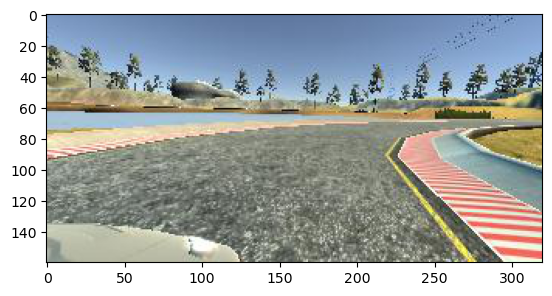

In [12]:
img=load_image(data_path,test_data[30][2])
plt.imshow(img)
steering_angle=test_target[0]
print(steering_angle)

# Data Preprocessing

In [13]:
IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS = 66, 200, 3
INPUT_SHAPE = (IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS)

In [14]:
def preprocess(img):

    img = img[60:-25, :, :]
    img = cv2.resize(img, (IMAGE_WIDTH, IMAGE_HEIGHT), cv2.INTER_AREA)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    return img

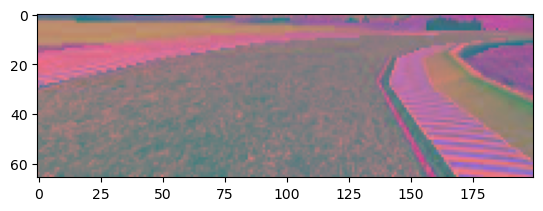

In [16]:
preprocessed_img=preprocess(img)
plt.imshow(preprocessed_img)

In [17]:
def random_adjust(data_dir, center, left, right, steering_angle):

    choice = np.random.choice(3)
    if choice == 0:
        return load_image(data_dir, left), steering_angle + 0.2
    elif choice == 1:
        return load_image(data_dir, right), steering_angle - 0.2
    return load_image(data_dir, center), steering_angle

0.2


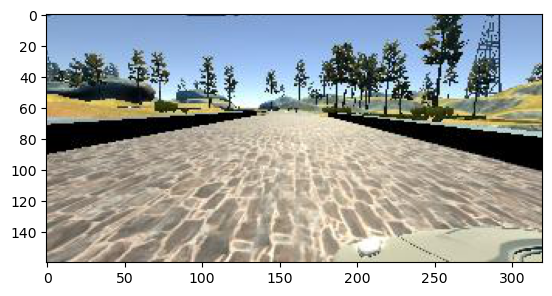

In [18]:
adjusted_img,adjusted_str=random_adjust(data_path,test_data[0][2],test_data[0][1],test_data[0][0],test_target[0])
plt.imshow(adjusted_img)
print(adjusted_str)

In [19]:
def display(image, angle, label):
    plt.imshow(image)
    plt.xlabel("Steering angle: {:.5f}".format(angle))
    plt.title(label)
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [20]:
def random_flip(image, steering_angle):

    if np.random.rand() < 0.5:
        image = cv2.flip(image, 1)
        steering_angle = -steering_angle
    return image, steering_angle

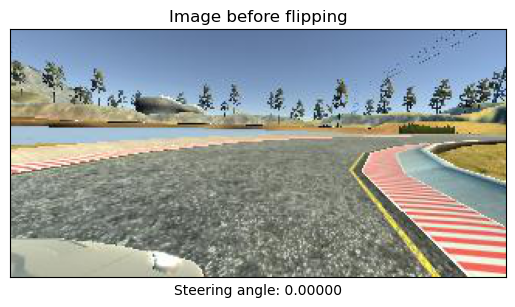

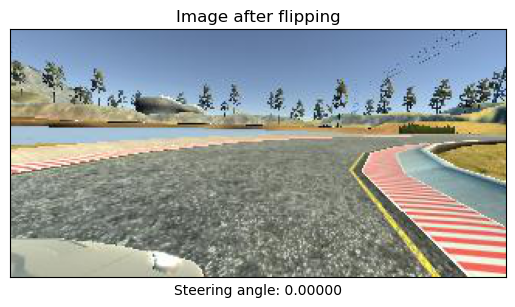

In [21]:
label = "Image before flipping"
display(img, steering_angle, label)

flipped_img,fliiped_str = random_flip(img, steering_angle)
label = "Image after flipping"
display(flipped_img, fliiped_str, label)

In [24]:
def random_shift(image, steering_angle, range_x, range_y):

    trans_x = range_x * (np.random.rand() - 0.5)
    trans_y = range_y * (np.random.rand() - 0.5)
    steering_angle += trans_x * 0.002
    trans_m = np.float32([[1, 0, trans_x], [0, 1, trans_y]])
    height, width = image.shape[:2]
    image = cv2.warpAffine(image, trans_m, (width, height))
    return image, steering_angle

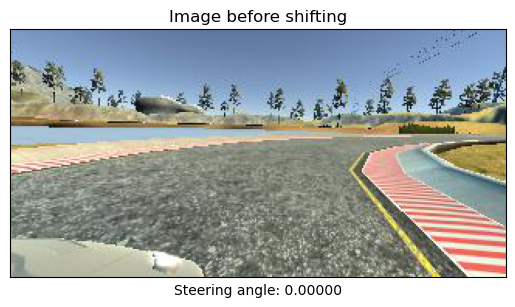

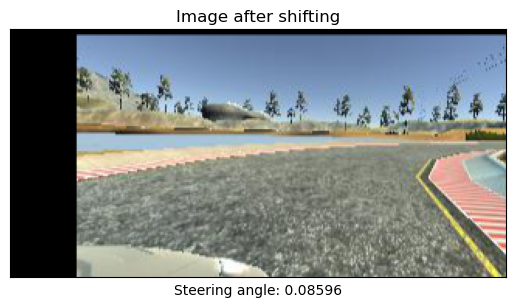

In [25]:
label = "Image before shifting"
display(img, steering_angle, label)

shifted_img,shifted_str = random_shift(img, steering_angle,100, 10)
label = "Image after shifting"
display(shifted_img, shifted_str, label)

In [26]:
def random_shadow(image):

    bright_factor = 0.3
    x = random.randint(0, image.shape[1])
    y = random.randint(0, image.shape[0])
    width = random.randint(image.shape[1], image.shape[1])
    if(x + width > image.shape[1]):
        x = image.shape[1] - x
    height = random.randint(image.shape[0], image.shape[0])
    if(y + height > image.shape[0]):
        y = image.shape[0] - y
    image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    image[y:y+height,x:x+width,2] = image[y:y+height,x:x+width,2]*bright_factor
    return cv2.cvtColor(image, cv2.COLOR_HSV2RGB)

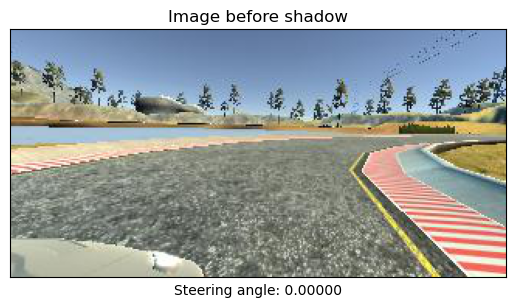

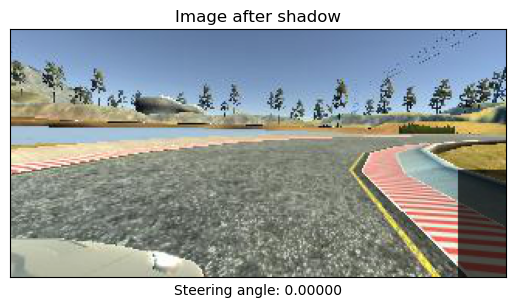

In [27]:
label = "Image before shadow"
display(img, steering_angle, label)

shadow_img = random_shadow(img)
label = "Image after shadow"
display(shadow_img, steering_angle, label)

In [28]:
def random_brightness(image):

    # HSV (Hue, Saturation, Value) is also called HSB ('B' for Brightness).
    hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    ratio = 1.0 + (np.random.rand() - 0.5)
    hsv[:,:,2] =  hsv[:,:,2] * ratio
    return cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)

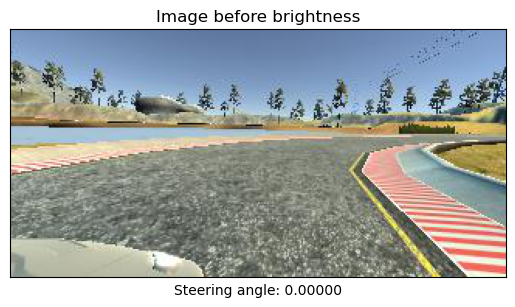

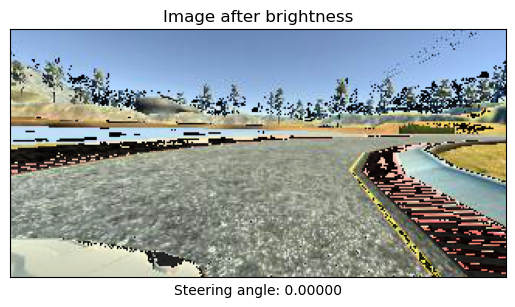

In [29]:
label = "Image before brightness"
display(img, steering_angle, label)

brightness_img = random_brightness(img)
label = "Image after brightness"
display(brightness_img, steering_angle, label)

In [30]:
def augument(data_dir, center, left, right, steering_angle, range_x=100, range_y=10):

    image, steering_angle = random_adjust(data_dir, center, left, right, steering_angle)
    image, steering_angle = random_flip(image, steering_angle)
    image, steering_angle = random_shift(image, steering_angle, range_x, range_y)
    image = random_shadow(image)
    image = random_brightness(image)
    return image, steering_angle

# CNN architecture

In [31]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten

def NVIDIA_model():
    
    model = Sequential()
    model.add(Lambda(lambda x: x/127.5-1.0, input_shape=INPUT_SHAPE))
    model.add(Conv2D(24, (5, 5), activation='elu', strides=(2, 2)))
    model.add(Conv2D(36, (5, 5), activation='elu', strides=(2, 2)))
    model.add(Conv2D(48, (5, 5), activation='elu', strides=(2, 2)))
    model.add(Conv2D(64, (3, 3), activation='elu'))
    model.add(Conv2D(64, (3, 3), activation='elu'))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(100, activation='elu'))
    model.add(Dense(50, activation='elu'))
    model.add(Dense(10, activation='elu'))
    model.add(Dense(1))
    model.summary()
    
    model.compile(loss='mse', optimizer=Adam(lr=1.0e-4))
    
    return model

In [32]:
batch_size = 40
samples_per_epoch = 20000
nb_epoch = 10

In [34]:
def batcher(data_dir, image_paths, steering_angles, batch_size, training_flag):

    images = np.empty([batch_size, IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS])
    steers = np.empty(batch_size)
    while True:
        i = 0
        for index in np.random.permutation(image_paths.shape[0]):
            center, left, right = image_paths[index]
            steering_angle = steering_angles[index]
            if training_flag and np.random.rand() < 0.6:
                image, steering_angle = augument(data_dir, center, left, right, steering_angle)
            else:
                image = load_image(data_dir, center) 
            images[i] = preprocess(image)
            steers[i] = steering_angle
            i += 1
            if i == batch_size:
                break
        yield images, steers

In [35]:
def train_model(model, X_train, X_valid, y_train, y_valid):
    
    checkpoint = ModelCheckpoint('model-{val_loss:03f}.h5',monitor='val_loss',save_best_only=True,mode='auto')
    
    model.fit_generator(batcher(data_path, X_train, y_train, batch_size, True),samples_per_epoch,nb_epoch,
                        validation_data=batcher(data_path, X_valid, y_valid, batch_size, False),validation_steps=len(X_valid)//batch_size,callbacks=[checkpoint])

In [36]:
model = NVIDIA_model()
train_model(model,train_data,test_data,train_target,test_target)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lambda (Lambda)             (None, 66, 200, 3)        0         
                                                                 
 conv2d (Conv2D)             (None, 31, 98, 24)        1824      
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 47, 36)        21636     
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 22, 48)         43248     
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 20, 64)         27712     
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 18, 64)         36928     
                                                                 
 dropout (Dropout)           (None, 1, 18, 64)         0

C:\Users\oshad\anaconda3\envs\py310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)
C:\Users\oshad\AppData\Local\Temp\ipykernel_23164\1461701333.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(batcher(data_path, X_train, y_train, batch_size, True),samples_per_epoch,nb_epoch,


Epoch 1/10
20000/20000 [==============================] - 1912s 95ms/step - loss: 0.0328 - val_loss: 0.0251
Epoch 2/10
20000/20000 [==============================] - 1539s 77ms/step - loss: 0.0265 - val_loss: 0.0237
Epoch 3/10
20000/20000 [==============================] - 1597s 80ms/step - loss: 0.0242 - val_loss: 0.0253
Epoch 4/10
20000/20000 [==============================] - 1560s 78ms/step - loss: 0.0226 - val_loss: 0.0197
Epoch 5/10
20000/20000 [==============================] - 1571s 79ms/step - loss: 0.0217 - val_loss: 0.0229
Epoch 6/10
20000/20000 [==============================] - 1877s 94ms/step - loss: 0.0210 - val_loss: 0.0227
Epoch 7/10
20000/20000 [==============================] - 1901s 95ms/step - loss: 0.0205 - val_loss: 0.0199
Epoch 8/10
20000/20000 [==============================] - 1789s 89ms/step - loss: 0.0201 - val_loss: 0.0177
Epoch 9/10
20000/20000 [==============================] - 1993s 100ms/step - loss: 0.0196 - val_loss: 0.0270
Epoch 10/10
20000/20000 [==